<a href="https://colab.research.google.com/github/cheetosdump/CCINSYSL_ASSIGNMENT_COM-DF211/blob/main/exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://raw.githubusercontent.com/Masterx-AI/Project_Housing_Price_Prediction_/main/hs.jpg" style="width: 700px;"/>

# Importing libraries 🐍

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Dataset 📁

In [36]:
df = pd.read_csv("house_prices.csv")

In [37]:
# Random 10 samples of data
df.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
182,5145000,3410,3,1,2,no,no,no,no,yes,0,no,semi-furnished
321,4025000,3630,3,2,2,yes,no,no,yes,no,2,no,semi-furnished
512,2520000,3000,2,1,2,yes,no,no,no,no,0,no,furnished
390,3500000,2135,3,2,2,no,no,no,no,no,0,no,unfurnished
270,4340000,4500,3,2,3,yes,no,no,yes,no,1,no,furnished
282,4270000,2175,3,1,2,no,yes,yes,no,yes,0,no,unfurnished
445,3150000,3450,1,1,1,yes,no,no,no,no,0,no,furnished
360,3710000,4040,2,1,1,yes,no,no,no,no,0,no,semi-furnished
410,3430000,3850,3,1,1,yes,no,no,no,no,0,no,unfurnished
323,4025000,5400,3,1,1,yes,no,no,no,no,3,no,semi-furnished


In [38]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [39]:
df.shape # data shape

(545, 13)

In [40]:
df.describe() # data stats

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [41]:
df.isnull().sum() # null values check

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [42]:
df.duplicated().sum() # duplicate values check

0

In [43]:
data=df.copy()

#### 1. Create a scatter plot

- the x axis should be the area
- the y axis should be the price
- the color of each data point should be based on the furnishing status


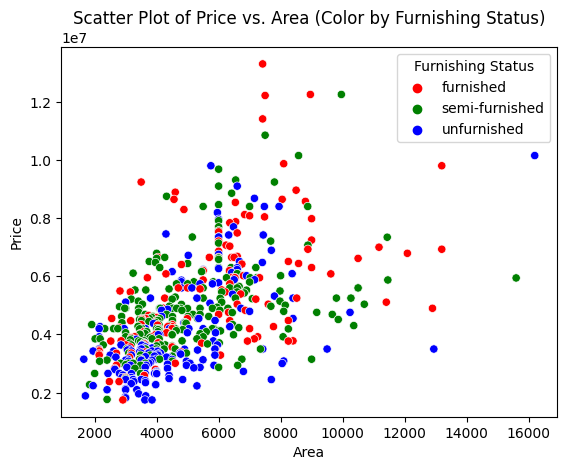

In [44]:
color_mapping = {
    'furnished': 'red',
    'semi-furnished': 'green',
    'unfurnished': 'blue'}

sns.scatterplot(data=df, x='area', y='price', hue='furnishingstatus', palette=color_mapping)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs. Area (Color by Furnishing Status)')
plt.legend(title='Furnishing Status')

plt.show()

#### 2. Apply the `get_dummies()` method to the categorical columns below.

- furnishingstatus
- mainroad
- guestroom
- basement
- hotwaterheating
- airconditioning
- prefarea

In [45]:
category = [
    'furnishingstatus',
    'mainroad',
    'guestroom',
    'basement',
    'hotwaterheating',
    'airconditioning',
    'prefarea']
df_encoded = pd.get_dummies(df, columns=category, drop_first=True)
print(df_encoded.head())


      price  area  bedrooms  bathrooms  stories  parking  \
0  13300000  7420         4          2        3        2   
1  12250000  8960         4          4        4        3   
2  12250000  9960         3          2        2        2   
3  12215000  7500         4          2        2        3   
4  11410000  7420         4          1        2        2   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  \
0                                0                             0   
1                                0                             0   
2                                1                             0   
3                                0                             0   
4                                0                             0   

   mainroad_yes  guestroom_yes  basement_yes  hotwaterheating_yes  \
0             1              0             0                    0   
1             1              0             0                    0   
2             1        

#### 3. Drop the categorical columns below.

- furnishingstatus
- mainroad
- guestroom
- basement
- hotwaterheating
- airconditioning
- prefarea

In [46]:
df.drop(category, axis=1, inplace=True)
print(df.head())

      price  area  bedrooms  bathrooms  stories  parking
0  13300000  7420         4          2        3        2
1  12250000  8960         4          4        4        3
2  12250000  9960         3          2        2        2
3  12215000  7500         4          2        2        3
4  11410000  7420         4          1        2        2


#### 4. Split the data set into a training and test set

In [47]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 436
Test set size: 109


#### 4. Use the the `MinMaxScaler()` method to scale down the training and test set.

In [54]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled Training Data:")
print(X_train_scaled[:5])  # Display first 5 rows
print("\nScaled Test Data:")
print(X_test_scaled[:5])   # Display first 5 rows

Scaled Training Data:
[[0.29896907 0.4        0.33333333 1.         0.33333333]
 [0.3814433  0.4        0.33333333 0.         1.        ]
 [0.14886598 0.2        0.         0.         0.66666667]
 [0.06597938 0.4        0.         0.33333333 0.        ]
 [0.1443299  0.4        0.         0.33333333 0.        ]]

Scaled Test Data:
[[0.29209622 0.6        0.33333333 0.33333333 0.33333333]
 [0.33333333 0.4        0.33333333 0.66666667 0.        ]
 [0.16426117 0.2        0.         0.         0.        ]
 [0.23024055 0.4        0.         0.33333333 0.        ]
 [0.15876289 0.4        0.         0.         0.        ]]


#### 5. Create a new instance of a Linear Regression model  

In [55]:
linear_regression_model = LinearRegression()

#### 6. Use the `fit()` method to train your model using the training set.

In [56]:
linear_regression_model.fit(X_train_scaled, y_train)

LinearRegression()

#### 7. Use the `predict()` method using the test set

In [65]:
y_pred = linear_regression_model.predict(X_test_scaled)

#### 7. Get the R2 Score

In [58]:
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

R-squared (R2) Score: 0.5464062355495866


#### 8. Use the normal equation to get the optimal slope and intercept

In [64]:
X_train_with_intercept = np.column_stack((np.ones(len(X_train_scaled)), X_train_scaled))
coefficients = np.linalg.inv(X_train_with_intercept.T.dot(X_train_with_intercept)).dot(X_train_with_intercept.T).dot(y_train)
intercept = coefficients[0]
slopes = coefficients[1:]
print("Intercept (b0):", intercept)
print("Slopes (b1, b2, ...):", slopes)

Intercept (b0): 2393709.381345922
Slopes (b1, b2, ...): [4494014.21107511  756233.75314764 3557195.14110359 1485302.28798527
 1012982.49089479]
